***Visualization***

Text(0.5, 1.0, 'Anzahl Wohnungen nach Stadtteil')

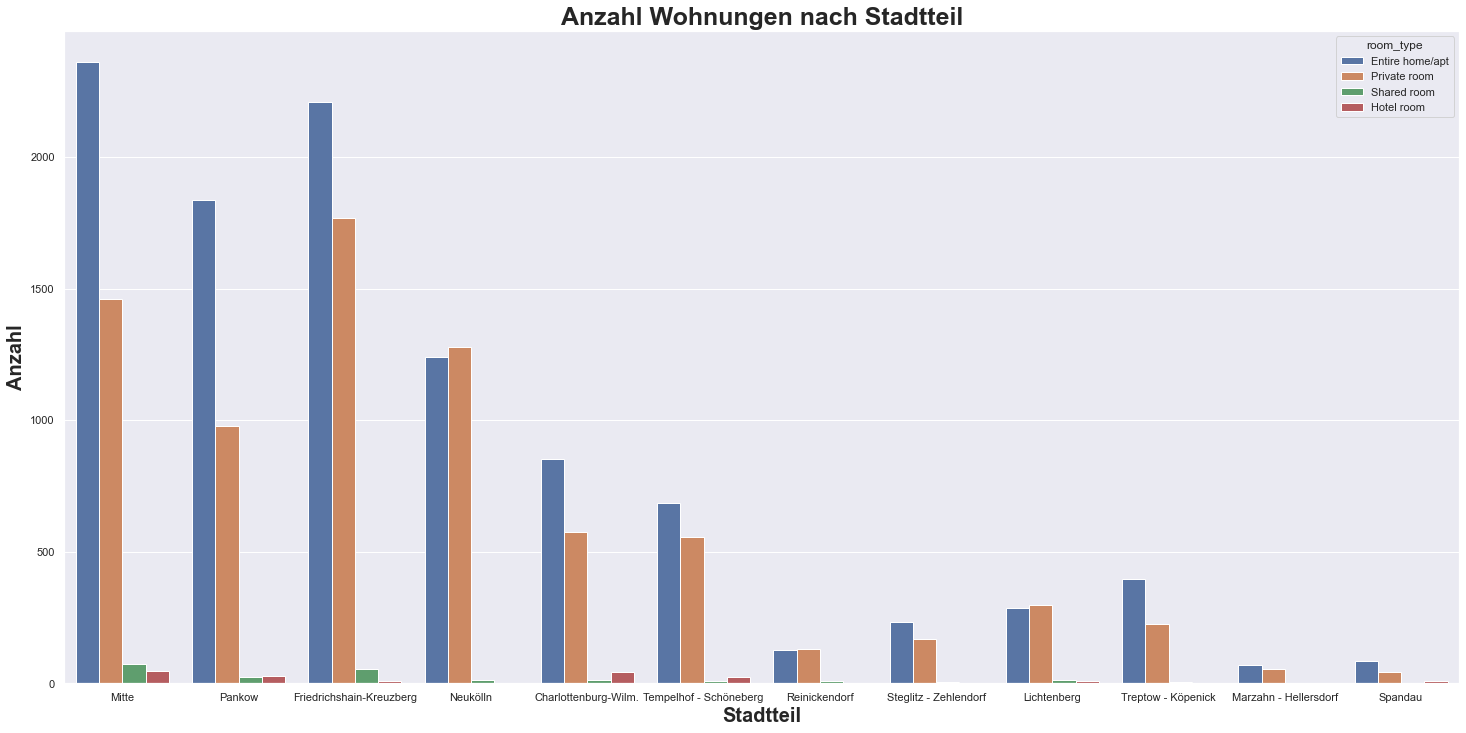

In [30]:
# Anzahl Wohnungsarten nach Stadtteil
ax = sns.countplot(x="neighbourhood_group_cleansed", hue = "room_type", data=df_listings)
#plt.ylim([0,2500])
sns.set(rc={'figure.figsize':(25,12)})
ax.set_xlabel("Stadtteil", fontweight='bold', fontsize = 20)
ax.set_ylabel("Anzahl", fontweight='bold', fontsize = 20)
ax.set_title("Anzahl Wohnungen nach Stadtteil", fontweight='bold', fontsize = 25)

Meiste Angebote in Mitte, Kreuzberg, Pankow und Neukölln

Text(0.5, 1.0, 'Preisverteilung nach Wohnungsart')

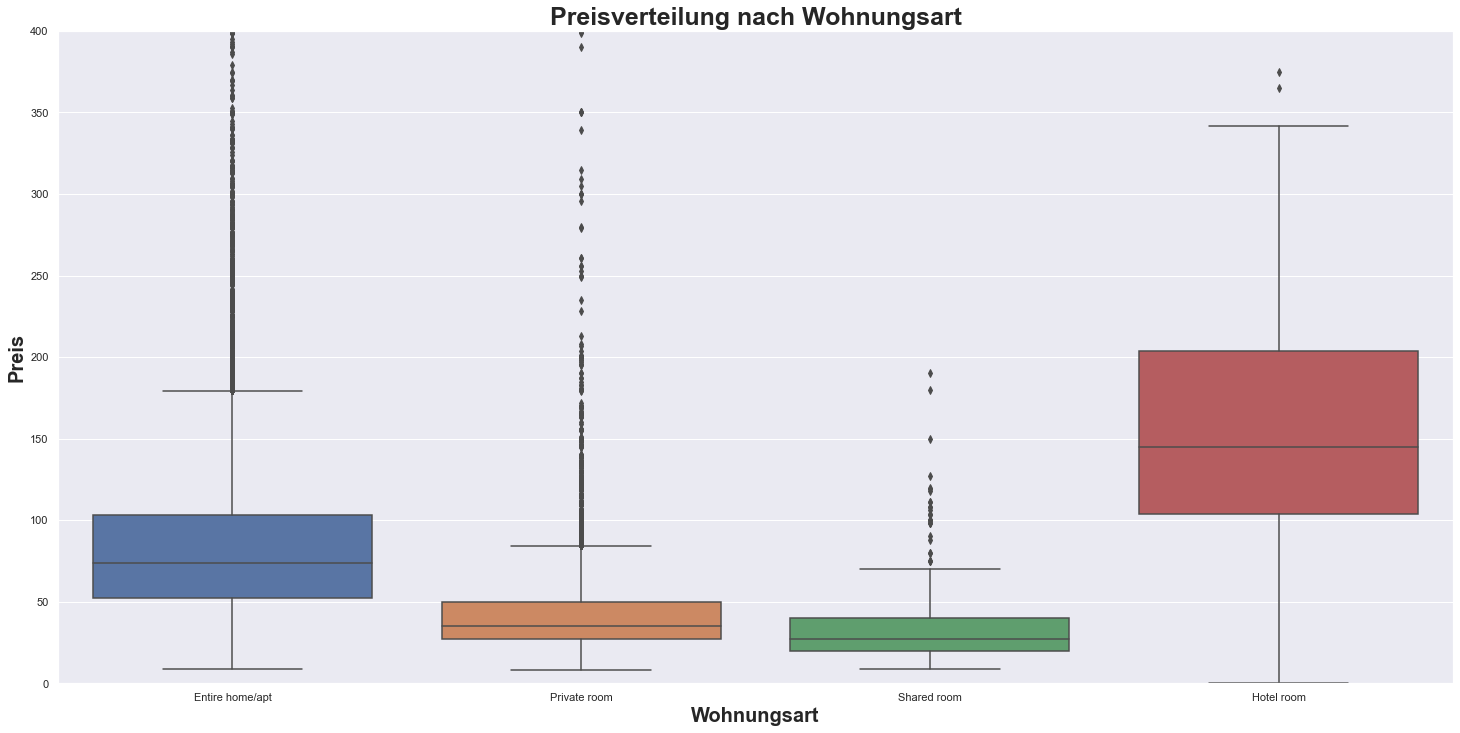

In [23]:
# Preisverteilung nach Wohnungsart
ax = sns.boxplot(x="room_type", y="price", data=df_listings)
plt.ylim([0,400])
sns.set(rc={'figure.figsize':(10,10)})
ax.set_xlabel("Wohnungsart", fontweight='bold', fontsize = 20)
ax.set_ylabel("Preis", fontweight='bold', fontsize = 20)
ax.set_title("Preisverteilung nach Wohnungsart", fontweight='bold', fontsize = 25)

Text(0.5, 1.0, 'Preisverteilung nach Stadtteil')

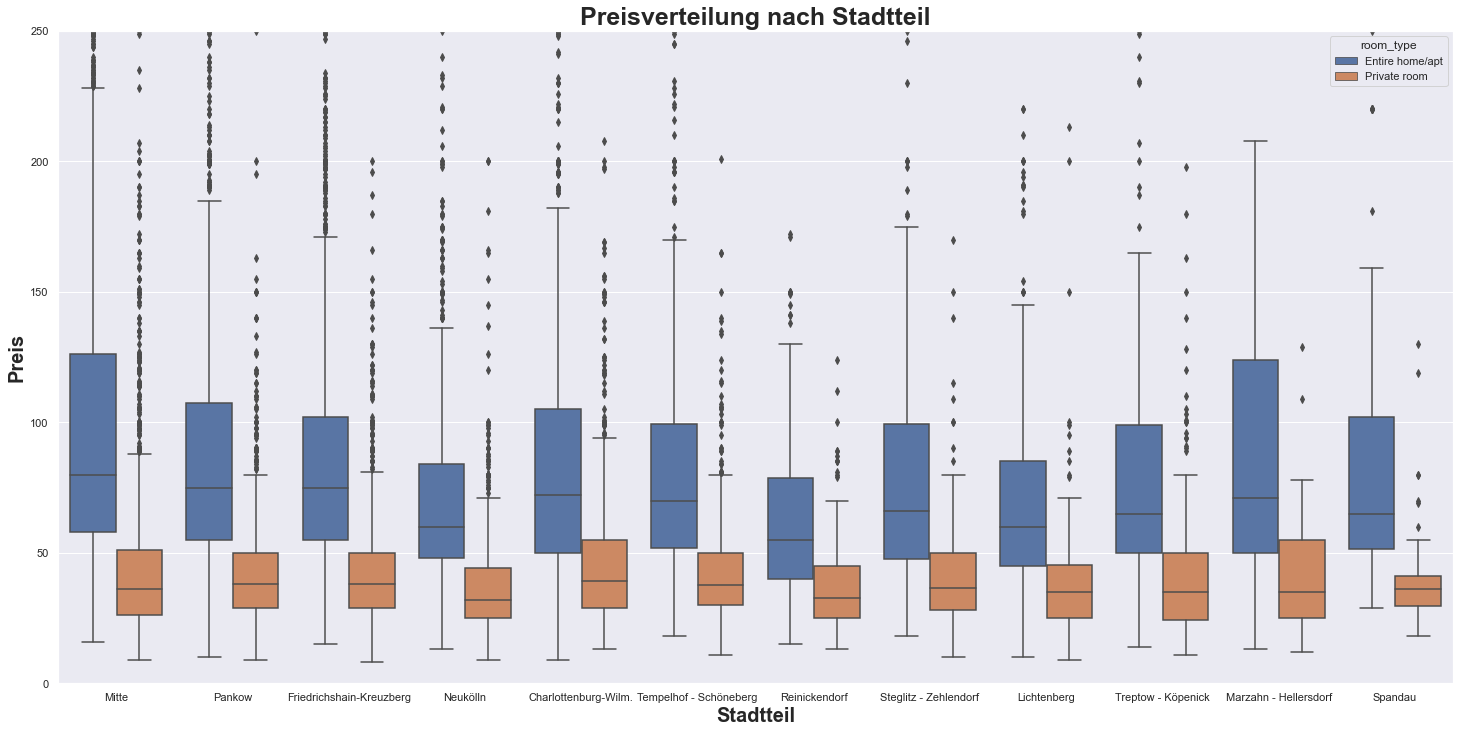

In [29]:
# Preisverteilung nach Stadtteil (meiste Wohnungen - wenigste Wohnungen)
ax = sns.boxplot(x="neighbourhood_group_cleansed", y="price", hue = "room_type", hue_order = ["Entire home/apt", "Private room"], data=df_listings)
plt.ylim([0,250])
sns.set(rc={'figure.figsize':(25,12)})
ax.set_xlabel("Stadtteil", fontweight='bold', fontsize = 20)
ax.set_ylabel("Preis", fontweight='bold', fontsize = 20)
ax.set_title("Preisverteilung nach Stadtteil", fontweight='bold', fontsize = 25)


Wie wir sehen können, sind die teuersten Stadtteile Mitte und Charlottenburg.

In [25]:
# Spalte Wochentag einfügen
df_calendar["date"] = pd.to_datetime(df_calendar["date"])
df_calendar["weekday"] = df_calendar["date"].dt.day_name()
df_calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,year,month,day,weekday
0,162111,2021-09-22,f,42.0,42.0,5.0,21.0,2021,9,22,Wednesday
1,243057,2021-09-22,f,185.0,181.0,2.0,1125.0,2021,9,22,Wednesday
2,243057,2021-09-23,f,185.0,181.0,3.0,1125.0,2021,9,23,Thursday
3,243057,2021-09-24,f,210.0,206.0,2.0,1125.0,2021,9,24,Friday
4,243057,2021-09-25,f,210.0,208.0,2.0,1125.0,2021,9,25,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
6674843,51415651,2022-09-17,f,210.0,210.0,1.0,8.0,2022,9,17,Saturday
6674844,51415651,2022-09-18,f,210.0,210.0,1.0,8.0,2022,9,18,Sunday
6674845,51415651,2022-09-19,f,210.0,210.0,1.0,8.0,2022,9,19,Monday
6674846,51415651,2022-09-20,f,210.0,210.0,1.0,8.0,2022,9,20,Tuesday


In [26]:
# Durchschnittspreis pro Wochentag
averageprice = df_calendar.groupby(['weekday'])[["price"]].mean()
# Durchschnitt vom Durchschnitt
treshold = averageprice.mean()
treshold

price    77.476773
dtype: float64

Text(0.5, 1.0, 'Durchschnittspreis nach Wochentag')

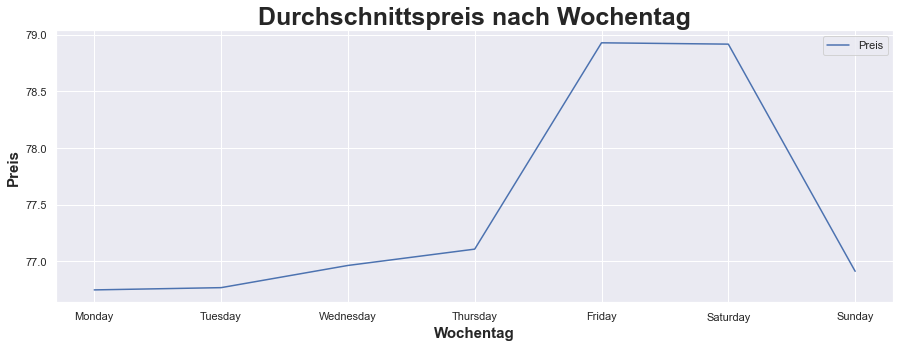

In [27]:
# Wochentage sortieren
listOfDays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
# Teuerste Tage in der Woche
ax = df_calendar.groupby(['weekday'])[["price"]].mean().reindex(listOfDays).plot(kind="line" , figsize=(15,5))  
ax.set_xlabel("Wochentag", fontweight='bold', fontsize = 15)
ax.set_ylabel("Preis", fontweight='bold', fontsize = 15)
plt.legend(["Preis"])
ax.set_title("Durchschnittspreis nach Wochentag", fontweight='bold', fontsize = 25)


Hochsaison September und Oktober